In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Final Crop_recommendation.csv")


In [ ]:
df.shape

(2200, 7)

In [ ]:
df.head()

,N,P,K,temperature,ph,rainfall,label
0,90,42,43,20.879744,6.502985,202.935536,rice
1,85,58,41,21.770462,7.038096,226.655537,rice
2,60,55,44,23.004459,7.840207,263.964248,rice
3,74,35,40,26.491096,6.980401,242.864034,rice
4,78,42,42,20.130175,7.628473,262.717340,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   ph           2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   label        2200 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 120.4+ KB


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
ph,0
rainfall,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,N,P,K,temperature,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,9.935091,298.560117


In [ ]:

crop_dict = {
    'rice': 0,
    'maize': 1,
    'jute': 2,
    'cotton': 3,
    'coconut': 4,
    'papaya': 5,
    'orange': 6,
    'apple': 7,
    'muskmelon': 8,
    'watermelon': 9,
    'grapes': 10,
    'mango': 11,
    'banana': 12,
    'pomegranate': 13,
    'lentil': 14,
    'blackgram': 15,
    'mungbean': 16,
    'mothbeans': 17,
    'pigeonpeas': 18,
    'kidneybeans': 19,
    'chickpea': 20,
    'coffee': 21
}
df['crop_num'] = df['label'].map(crop_dict)

In [ ]:
X = df[['N', 'P', 'K', 'temperature', 'ph', 'rainfall']]
y = df['crop_num']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}


KNN Accuracy: 0.9409
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       1.00      0.90      0.95        21
           2       0.70      0.91      0.79        23
           3       0.89      1.00      0.94        17
           4       1.00      1.00      1.00        27
           5       1.00      0.91      0.95        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.79      1.00      0.88        11
          15       0.86      0.95      0.90        20
          16       0.86      1.00      0.93        19
      

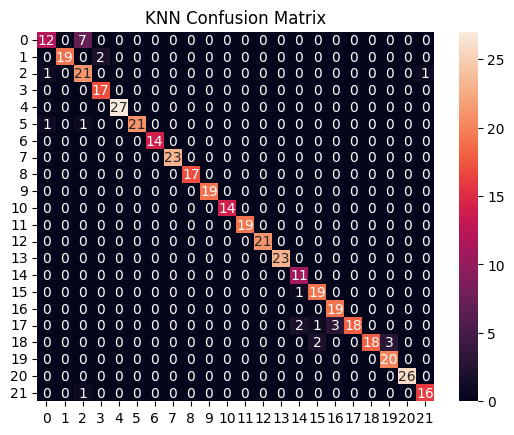

SVM Accuracy: 0.9295
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       1.00      0.90      0.95        21
           2       0.75      0.91      0.82        23
           3       0.89      1.00      0.94        17
           4       1.00      1.00      1.00        27
           5       1.00      0.91      0.95        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.85      1.00      0.92        11
          15       0.90      0.95      0.93        20
          16       0.66      1.00      0.79        19
      

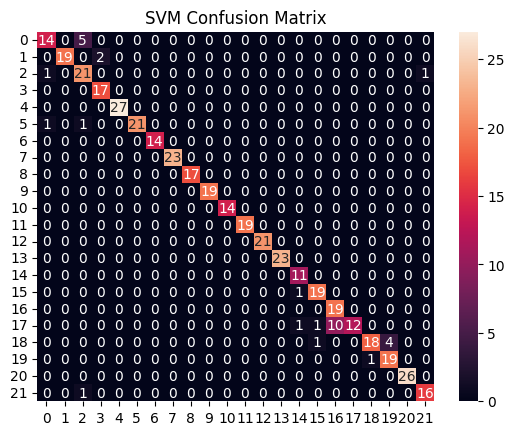

Naive Bayes Accuracy: 0.9750
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       1.00      0.90      0.95        21
           2       0.88      0.91      0.89        23
           3       0.89      1.00      0.94        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       0.95      1.00      0.98        20
          16       0.95      0.95      0.95        1

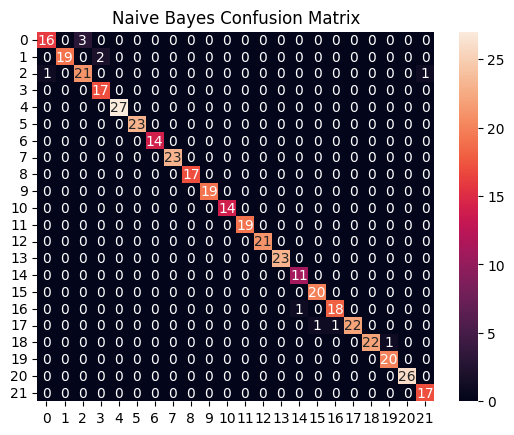

Random Forest Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       1.00      0.95      0.98        21
           2       0.91      0.87      0.89        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       0.95      1.00      0.98        20
          16       0.95      1.00      0.97       

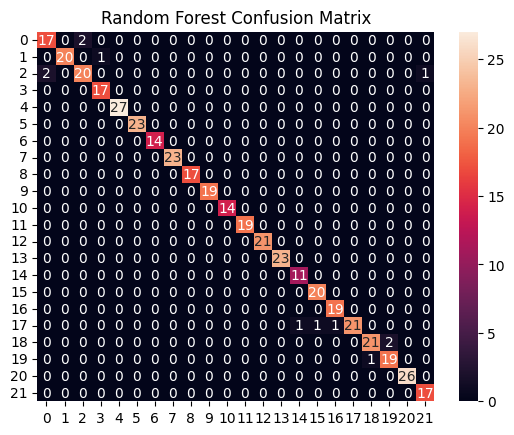

XGBoost Accuracy: 0.9636
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       1.00      0.95      0.98        21
           2       0.91      0.87      0.89        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       0.91      1.00      0.95        20
          16       0.89      0.89      0.89        19
  

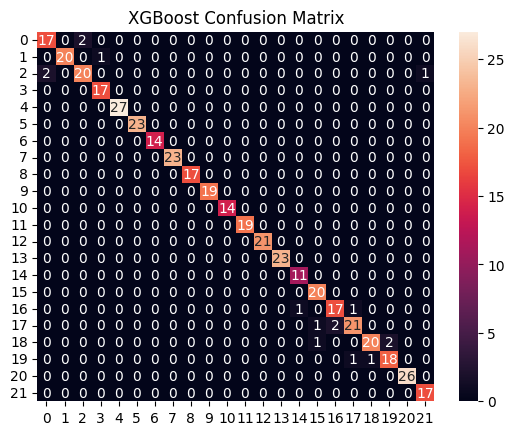

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

In [ ]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'label', 'crop_num'], dtype='object')


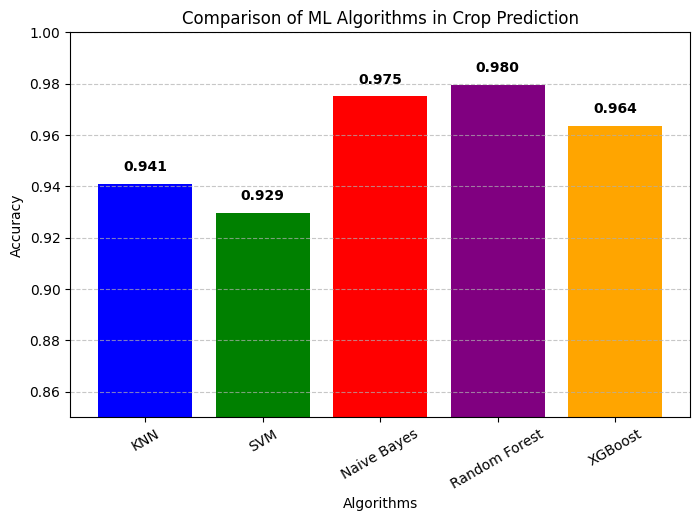

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values from trained models
accuracies = {
    'KNN': 0.9409,
    'SVM': 0.9295,
    'Naive Bayes': 0.9750,
    'Random Forest': 0.9795,
    'XGBoost': 0.9636
}

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

# Customize the graph
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of ML Algorithms in Crop Prediction")
plt.ylim(0.85, 1.0)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (key, value) in enumerate(accuracies.items()):
    plt.text(i, value + 0.005, f"{value:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


In [ ]:
def recommendation(N, P, k, temperature, ph, rainfall):
    features = np.array([[N, P, k, temperature, ph, rainfall]])
    transformed_features = scaler.transform(features)
    prediction = rfc.predict(transformed_features)

    # Get the crop name corresponding to the predicted index
    crop_name = list(crop_dict.keys())[list(crop_dict.values()).index(prediction[0])]

    print(f"Predicted Crop: {crop_name}")  # Print the crop name instead of the index
    return prediction[0]

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
N = 18
P = 19
k = 27
temperature = 27.75
ph = 4.77
rainfall = 94.11

In [ ]:
predict = recommendation(N, P, k, temperature, ph, rainfall)

Predicted Crop: mango


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
N = 40
P = 58
k = 75
temperature = 18.59
ph = 7.16
rainfall = 89.60

In [ ]:
predict = recommendation(N, P, k, temperature, ph, rainfall)

Predicted Crop: chickpea


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
N =
P =
k =
temperature =
ph = 7.16
rainfall = 89.60

In [ ]:
predict = recommendation(N, P, k, temperature, ph, rainfall)

Predicted Crop: apple


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
